# <U><B>ANÁLISE DE DADOS PARA CAMPANHAS DE MARKETING DE INSTITUIÇÕES FINANCEIRAS - VALORES AUSENTES
    

##  RESUMOS

###  SOBRE O PROJETO

"Vamos analisar dados referentesa campanhas de marketing direto de uma instituição bancária  portuguesa.  As  campanhas  de  marketing  foram  baseadas  em  ligações  telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de saberse o produto (depósito bancário a prazo) seria ('sim') ou não ('não') adquirido pelo cliente.

O dataset apresenta diversos problemas pois é um dataset com dados reais. Daremos ênfase ao tratamento de valores ausentes, mas também faremos a limpeza e tratamento de outros eventuais problemas que detectarmos."

Data Science Academy

Este projeto se baseia no capítulo 5 do curso "Análise de dados com linguagem Python", da DSA. Nele veremos os conceitos de tratamento de valores ausentes, além das principais técnicas e estratégias para esse tipo de tratamento. Com isso, a análise exploratória será feita de forma um pouco mais rápida.

A maioria dos comentários das células se refere às tarefas a serem executadas após a exibição dos vídeos, para realmente testar e fixar o que foi aprendido sem nenhum tipo de "cola".

###  SOBRE TRATAMENTO DE VALORES AUSENTES

####  DEFINIÇÕES E ENTENDIMENTOS

Um erro comum é achar que valores ausentes significam falta de dado. Não! Na verdade, valores ausentes significam ausência de informação. São um problema e devem ser tratados.

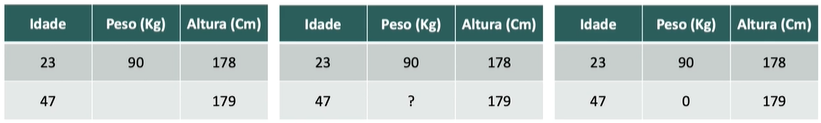

A imagem acima mostra 3 situações onde temos falta de informação. Mesmo que o dado esteja presente no registro, pode não nos trazer nenhum entendimento válido sobre o que queremos entender. No caso da "?", por exemplo, qual retorno temos com esse dado? Nenhum! Assim como é impossível algum ser humano possuir peso == 0.

O reconhecimento desse tipo de situação vem com a análise de cada variável, verificação de valores únicos, leitura do dicionário de dados, etc. Fazendo tal reconhecimento, pode-se escolher a ou as estratégias para esse tratamento.

####  COMO DECIDIR QUAL É A MELHOR ESTRATÉGIA?

Essa resposta vai sempre depender do problema, do cenário e do contexto aonde os dados se encaixam e do próprio dataset em si. Dizer que uma técnica específica é ideal é errado, pois cada uma pode impactar de uma forma nos dados.

Algumas técnicas, essas fáceis de identificar, devem ser evitadas:
* preencher valores ausentes com valores aleatórios ou sem critério não é uma boa solução
* a média não é uma boa opção para preencher valores ausentes em uma distribuição que não é normal. Nesse caso, a moda e a mediana são melhores opções.
* não é uma boa idéia preencher valores ausentes em variáveis qualitativas com valores inventados. A solução pode ser usar o termo "Outro" ou "Outros", por exemplo.

Uma boa opção é recorrer ao "dono" dos dados. Perguntar porque aqueles valores foram inseridos pode ser a resposta que você precisa, pois o "dono" por saber exatamente a origem desse valor.

####  TÉCNICAS PARA TRATAMENTO DE VALORES AUSENTES

Existem diversas técnicas para esse tipo de tratamento. Algumas:
* Listwise or Case Deletion -> deletar os casos. Cada caso é uma linha/registro/observação. É a técnica mais simples. Nesse caso, pode haver muita perda de dados
* Pairwise Deletion -> fazer a deleção com base em algum critério, deletando pares de registros ao invés de registros individuais.
* Imputation -> imputação de valores com base em algum critério.
* Multiple Imputation -> imputação de valores em vários registros ao mesmo tempo, com base em algum critério.
* Regression Imputation -> imputação de valores baseada em regressão, usando Machine Learning.
* Last Observation Carried Forward/Backward (Forward/Backward Fill) -> preenchimento de valores ausentes andando para frente ou para trás, utilizando o último valor observado até que apareça um novo valor não ausente/válido.
* Maximum Likelihood -> baseada em Machine Learning.
* Expectation-Maximization -> baseada em Machine Learning.
* Sensitivity Analysis -> Mbaseada em achine Learning.
* KNN (K Nearest Neighbors)  -> baseada em Machine Learning.

Neste projeto, será dada ênfase à técnica de <b>Imputação</b>.

####  IMPUTAÇÃO

"Imputação é uma técnica usada para substituir os valores ausentes por algum valor substituto para reter a maioria dos dados/informações do conjunto de dados." - DSA

"Essa técnica é usada porque a remoção dos dados do conjunto de dados pode não ser viável e levar a uma grande redução no tamanho do conjunto de dados, o que não só levanta preocupações quanto ao enviesamento do conjunto de dados, mas também pode levar a uma análise incorreta." - DSA

Uma exemplo de enviesamento de um dataset, causado pela remoção de muitos registros/linhas: imaginemos uma variável referente ao gênero da pessoa. Temos sexo masculino e feminino.

Supomos que haja muitos valores ausentes na coluna idade, por exemplo, aonde o gênero seja feminino. Caso as linhas aonde a idade é nula sejam removidas (em maioria de pessoas do sexo feminino), o resultado será que restarão muitos registros de pessoas do sexo masculino, levando à uma análise tendenciosa.

É importante frisar que a imputação não é uma técnica perfeita para tratamento de valores ausentes. Ela também modifica o comportamento dos dados. Contudo, ela ajuda a reduzir problemas de tendência dos dados. O desafio, aqui, é modificar o menos possível esse comportamento, selecionando técnicas adequadas para cada tipo de situação.

A imputação possui várias possibilidades, dependendo do tipo de dado (quantitativo ou qualitativo), se haverá aplicação de Machine Learning, qual medida de tendência central será usada, etc. No caso de variáveis qualitativas, podemos fazer o preenchimento de acordo com alguma regra específica (de acordo com o preenchimento em um registro com outra variável) ou com o valor mais frequente, por exemplo, com a Imputação Múltipla.

##  IMPORTS

In [92]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

##  LEITURA DOS DADOS

In [2]:
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# amostra
dados.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [4]:
# shape
dados.shape

(45211, 19)

##  VERIFICAÇÃO E TRATAMENTO DE VALORES AUSENTES

###  INFO E ISNA

In [5]:
# infor
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [6]:
# há valores na?
dados.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [7]:
# quantos valores nulos em cada coluna?
dados.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Percebemos que há 4 colunas com valores ausentes. Elas serão devidade tratadas. Primeiramente, vamos excluir a coluna "customerid", pois, para análise, ela não acrescenta nada.

In [8]:
# remover coluna id
dados.drop('customerid', axis = 1, inplace = True)

In [9]:
# colunas
dados.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

###  COLUNA jobedu

A coluna "jobedu" parece ter duas informações. Vamos verificar.

In [10]:
dados['jobedu'].head()

0       management,tertiary
1      technician,secondary
2    entrepreneur,secondary
3       blue-collar,unknown
4           unknown,unknown
Name: jobedu, dtype: object

Realmente, ela parece se referir ao tipo de emprego que o cliente possui e o nível educacional. Podemos separar em duas colunas. Depois, podemos remover a própria coluna "jobedu".

In [11]:
# separar a coluna jobedu em 2
dados['job'] = [job.split(',')[0] for job in dados['jobedu']]
dados['education'] = dados['jobedu'].apply(lambda x: x.split(',')[1])

In [12]:
dados[['jobedu', 'job', 'education']].sample(5)

,jobedu,job,education
5117,"blue-collar,secondary",blue-collar,secondary
39239,"blue-collar,secondary",blue-collar,secondary
4083,"blue-collar,secondary",blue-collar,secondary
33447,"retired,tertiary",retired,tertiary
25943,"self-employed,tertiary",self-employed,tertiary


In [13]:
# removendo coluna jobedu
dados.drop('jobedu', axis = 1, inplace = True)

In [14]:
dados.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

###  TRATAMENTO DE VALORES AUSENTES

In [15]:
# variáveis que possuem valor ausente
dados.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [16]:
# pegando as colunas com valores ausentes
cols_vals_ausentes = [index for index, valor in zip(dados.isna().any().index, dados.isna().any().values) if valor == True]                            
cols_vals_ausentes

['age', 'salary', 'month', 'response']

In [17]:
# percentual de valores ausentes para cada variável que possua algum
for coluna in cols_vals_ausentes:
    print(f'A coluna {coluna.upper()} tem {(dados[coluna].isna().mean() * 100).round(2)}% valores ausentes.') 

A coluna AGE tem 0.04% valores ausentes.
A coluna SALARY tem 0.06% valores ausentes.
A coluna MONTH tem 0.11% valores ausentes.
A coluna RESPONSE tem 0.07% valores ausentes.


As porcentagens de valores ausentes nessas colunas são muito baixas. De acordo com a convenção (30%), não faz sentido excluí-las, pois poderíamos perder alguma informação valiosa.

Em relação à coluna age, podemos excluir os registros/linhas com valores ausentes ou aplicar a imputação. Com a remoção, perderíamos em torno de 20 observações. Com a imputação, modificamos os dados. 

Como são poucos registros, vamos utilizar a técnica de imputaçao, que deve resolver bem esse caso. Vamos agora fazer algumas análises e escolher a melhor técnica para fazer essa imputação.

####  Variável age

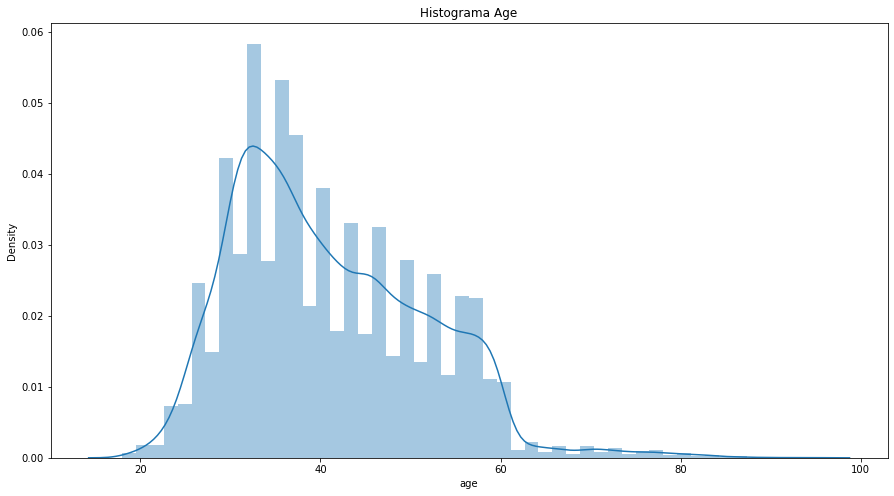

In [18]:
# histograma da variável age
plt.figure(figsize = (15,8))
sns.distplot(dados['age'])
plt.title('Histograma Age');

O histograma nos mostra que a variável age está assimétrica. Ou seja, ela provavelmente não segue uma distribuição normal. Isso, então, descarta a média como valor para preenchimento dos valores ausentes.

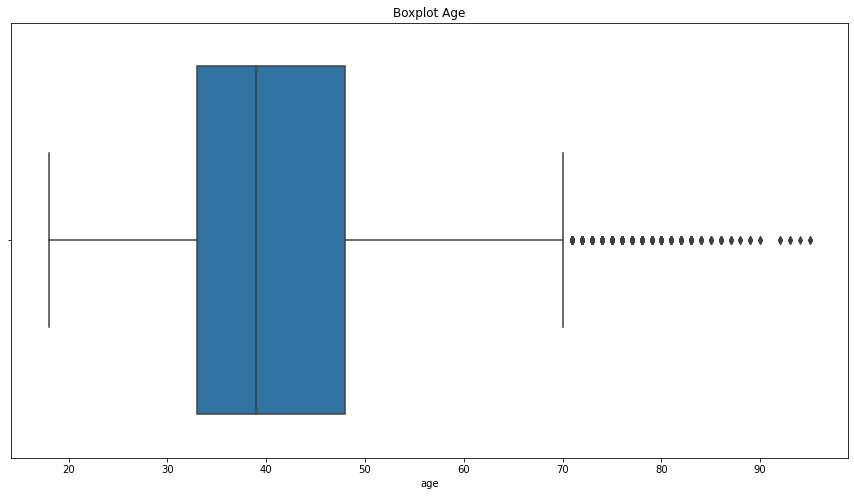

In [19]:
# boxplot
plt.figure(figsize = (15,8))
sns.boxplot(dados['age'])
plt.title('Boxplot Age');

O boxplot mostra que temos outliers acima de 70 anos e que a mediana está perto dos 40. Vemos também que a maioria das pessoas das observações possuem entre 30 e 50 anos. 

Se há outliers, temos mais um motivo para não utilizar a média, pois ela é muito influenciada por eles. Sobram, então, 2 possibilidades: imputação com a mediana ou com moda. 

Vamos verificar as medidas de tendência central.

In [20]:
# media
dados['age'].mean()

40.93565090394105

In [21]:
# mediana
dados['age'].median()

39.0

In [22]:
# moda
dados['age'].mode()[0]

32.0

Os valores ausentes serão preenchidos com a moda, pois são poucos os valores ausentes e assim alteramos muito pouco o padrão nos dados. A mediana, pelo contrário, pode acabar modificando o comportando dos dados caso seja escolhida para a imputação, apesar de não ser errado utilizá-la.

In [23]:
# imputação
dados['age'].fillna(dados['age'].mode()[0], inplace = True)

In [24]:
dados['age'].isna().sum()

0

In [25]:
# converter os valores de age para int
dados['age'] = dados['age'].astype('int')

In [26]:
# tipo da variavel
dados['age'].dtypes

dtype('int32')

In [27]:
# media
dados['age'].mean()

40.93169803808808

In [28]:
# mediana
dados['age'].median()

39.0

In [29]:
# moda
dados['age'].mode()[0]

32

In [30]:
# porcentagem de valores ausentes de age
dados['age'].isna().mean()

0.0

####  Variável month

In [31]:
# total de valores ausentes
dados['month'].isna().sum()

50

In [32]:
# percentual
(dados['month'].isna().mean()*100).round(2)

0.11

A variável month tem menos de 30% de valores ausentes. Isso significa  que não é uma boa solução excluí-la. Podemos excluir os registros com valores ausentes nessa variável ou fazer a imputação. Se excluirmos, perdemos informação. Então vamos fazer a imputação.

In [33]:
# tipo de dados
dados['month'].dtypes

dtype('O')

In [34]:
# contagem de registros para cada categoria
dados['month'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [35]:
dados.shape

(45211, 19)

Temos uma quantidade muito pequena de dados ausentes na variável month. Sendo assim, vale a pena preenchermos esses dados com o valor de maior presença entre todos: may, 2017

In [36]:
dados['month'].fillna(dados['month'].mode()[0], inplace = True)

In [37]:
# quantidade de valores ausentes
dados['month'].isna().sum()

0

####  Variável salary 

In [38]:
# tipo da variável
dados['salary'].dtypes

dtype('float64')

In [39]:
# quantidade de valores ausentes
dados['salary'].isnull().sum()

26

In [40]:
# porcentagem
(dados['salary'].isnull().mean()*100).round()

0.0

A quantidade de valores ausentes é ínfima. Podemos usar a imputação para preenchê-los. Mas se verificarmos os dados dessa variável, perceberemos que há o valor 0. Alguém trabalharia de graça?

Esse valor, 0, pode representar a ausência de informação. Com isso, podemos também fazer imputação nos registros onde esse valor está. 

OBS: nesse caso, vamos substituir o valor 0. Mas, em uma empresa, deve-se conferir, primeiramente, com a área de negócios a existência desse valor.

In [41]:
# verificar valores únicos
dados['salary'].value_counts()

20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

Há 288 valores 0.

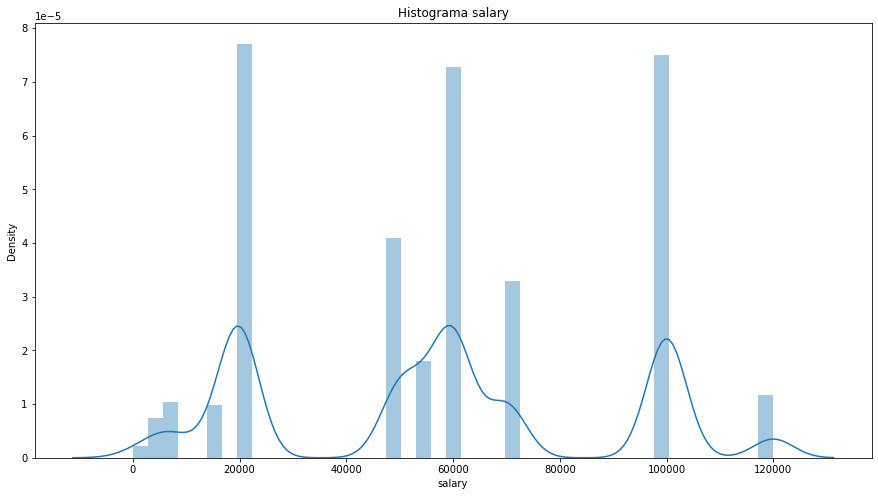

In [42]:
# distribuição dos dados
plt.figure(figsize = (15,8))
sns.distplot(dados['salary'])
plt.title('Histograma salary');

A variável não apresenta nenhum padrão específico: nem simétrico, nem assimétrico.

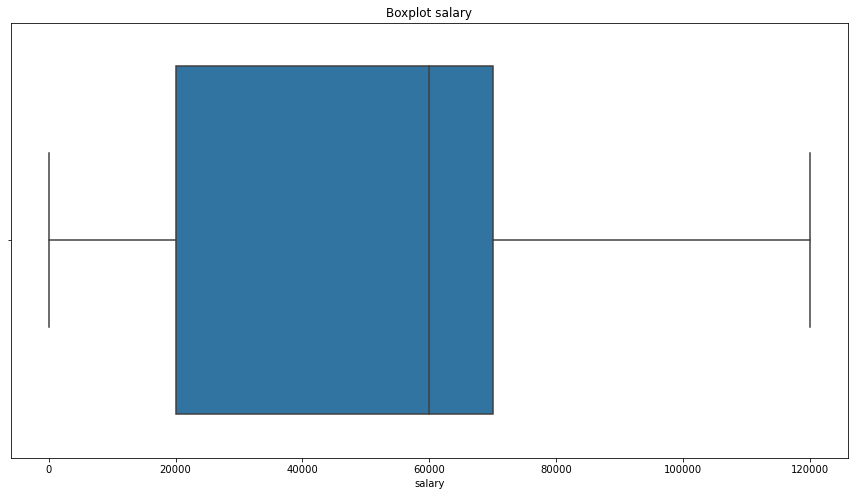

In [43]:
# boxplot
plt.figure(figsize = (15,8))
sns.boxplot(dados['salary'])
plt.title('Boxplot salary');

Não há outliers. Além disso, a maioria dos valores da variável encontra-se abaixo da mediana.

In [44]:
# media
dados['salary'].mean()

57008.65331415293

In [45]:
# mediana
dados['salary'].median()

60000.0

In [46]:
# moda
dados['salary'].mode()[0]

20000.0

Vamos usar a mediana para a imputação. Os dados parecem ser assimétricos. Sendo assim, não podemos usar a média. Além disso, a moda está muito abaixo dos valores da média e da mediana. Sendo assim, poderia mudar o comportamento da distribuição dos dados.

Para variáveis com valores muito altos, como salary, imputar a moda pode ser perigoso pois estaríamos reforçando a diferença entre ela e a média. 

In [47]:
dados['salary'].fillna(dados['salary'].median(), inplace = True)

In [48]:
dados['salary'].isnull().sum()

0

Agora precisamos adotar alguma estratégia para os registros que possuem salary == 0.

In [49]:
# tipo da variável
dados['salary'].dtypes

dtype('float64')

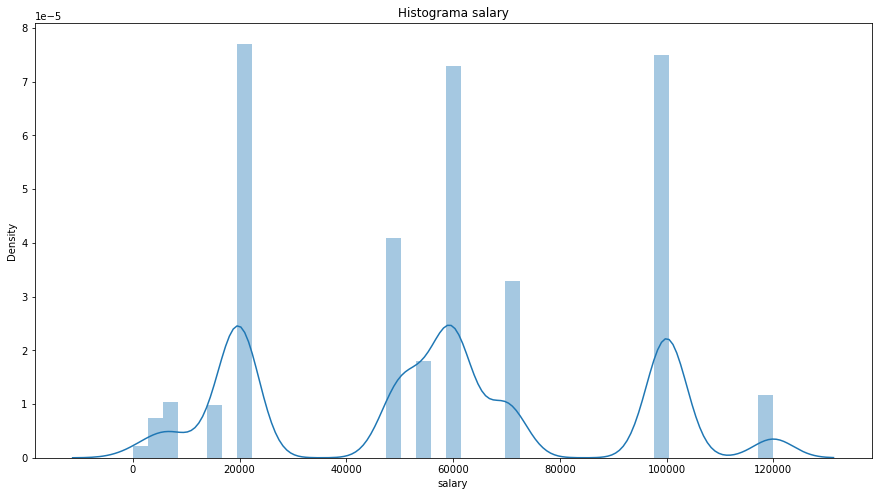

In [50]:
# distribuição dos dados
plt.figure(figsize = (15,8))
sns.distplot(dados['salary'])
plt.title('Histograma salary');

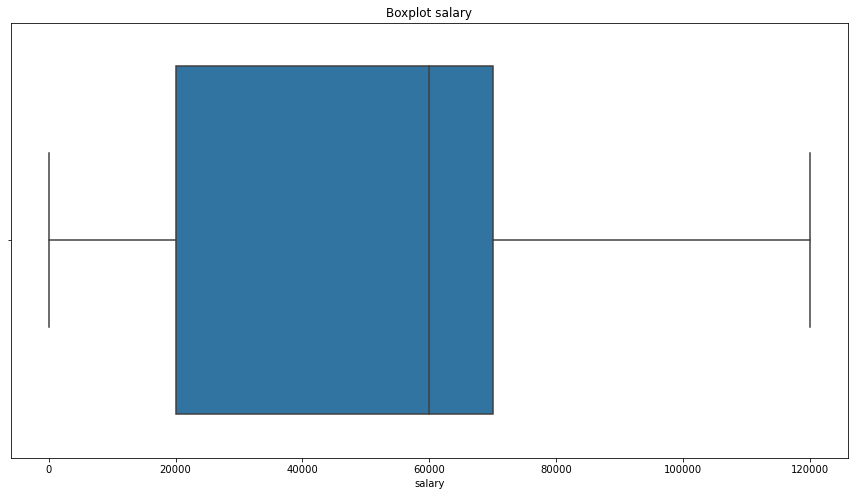

In [51]:
# boxplot
plt.figure(figsize = (15,8))
sns.boxplot(dados['salary'])
plt.title('Boxplot salary');

Os registros que possuem o valor 0 também serão substituídos pela mediana, pelos mesmos motivos explicados anteriormente.

In [52]:
# replace 
dados['salary'] = dados['salary'].replace(0, dados['salary'].median())

In [53]:
# quantidade de valores
dados['salary'].value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

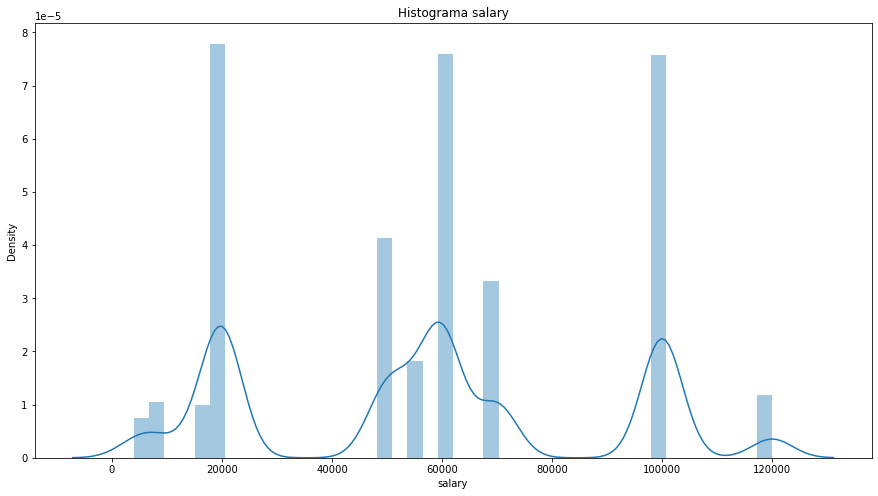

In [54]:
# histograma
plt.figure(figsize = (15,8))
sns.distplot(dados['salary'])
plt.title('Histograma salary');

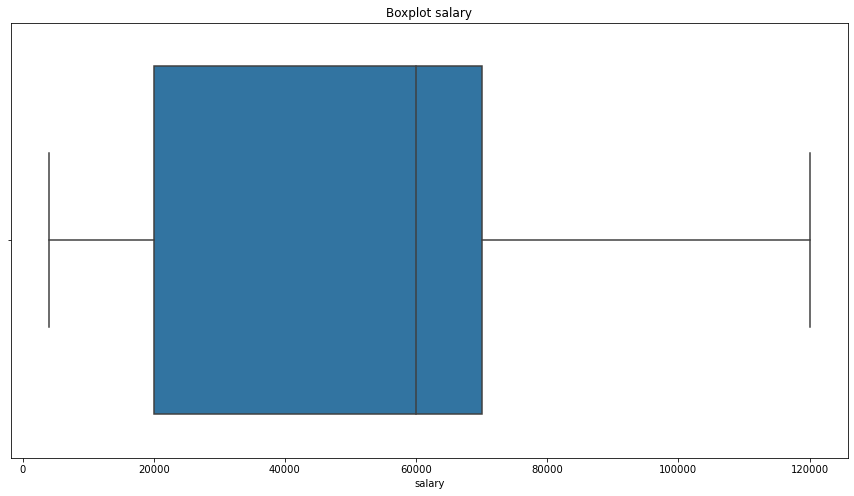

In [55]:
# boxplot
plt.figure(figsize = (15,8))
sns.boxplot(dados['salary'])
plt.title('Boxplot salary');

####  Variável response (variável <u><b>target</b></u>)

Essa variável é a resposta. Estudamos o relacionamento das outras variáveis com ela. Nesse caso, ela representa a informação se o cliente comprou ou não o produto da instituição bancária.

É uma variável do tipo object, com as respostas yes ou no.

In [56]:
# tipo da variável
dados['response'].dtypes

dtype('O')

In [57]:
# quantidade de valores ausentes
dados['response'].isnull().sum()

30

In [58]:
# porcentagem de valores ausentes
(dados['response'].isnull().mean()*100).round(2)

0.07

In [59]:
dados['response'].value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

Temos 0.07 valores ausentes na variável resposta. Faz sentido excluí-la? Claro que não! Já não faz muito sentido de acordo com a convenção dos 30%...

Podemos então excluir os registros com valores ausentes ou fazer imputação. Nesse caso específico da variável target, ela é uma variável especial, pois tudo que fazemos na prática é pensando exatamente nela. Sendo assim, não é o ideal imputar seus valores, pois estaríamos interferindo demais no seu processo de análise. Essa solução seria melhor se houvesse muitos dados faltando. O mais seguro, nesse caso, é excluir os registros nulos que ela possui.

In [60]:
dados.dropna(subset = ['response'], inplace = True)

In [61]:
dados['response'].isnull().sum()

0

####  Tratamento de valores ausentes para grande volume de valores NA (variável pdays)

A variável pdays representa o número de dias até o pagamento do produto. Vamos verificar seus dados, como exemplo de registros "estranhos" entre seus dados.

Vamos verificar se há, nessa variável, valores que não são explicitamente ausentes, mas não trazem nenhuma informação relevante. Como já foi dito, um valor ausente é aquele com ausência de informação.

In [62]:
# valores ausentes de pday
dados['pdays'].isna().sum()

0

In [63]:
# descrição dos dados dessa variável
dados['pdays'].describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Podemos ver que há o valor -1. Parece ser um valor sem informação relevante. Ele, por ser numérico, pode participar de cálculos como média, mediana, moda, etc., atrapalhando a verdadeira realidade dos dados. Ele pode, talvez, representar exatamente um valor ausente. Nâo sabemos. Mas podemos tratá-lo de acordo com a regra de negócio que resolvermos seguir.

Essa descrição dos dados, na verdade, pode (deve?) ser feita em todas as variáveis numéricas. Já para as variáveis categóricas, podemos utilizar a função value_counts(). Ambas nos ajudam a verificar valores ausentes ou ausência de informação. Estamos fazendo na variável pdays como exemplo.

In [64]:
# replace de -1 por NaN
# usar numpy
dados['pdays'] = dados['pdays'].replace({-1.0:np.NaN})

In [65]:
# quantidade de valores ausentes
dados['pdays'].isna().sum()

36930

In [66]:
# porcentagem
dados['pdays'].isna().mean() * 100

81.73789867422147

Os valores -1 foram substituídos por valores "verdadeiramente nulos" através da constante NaN, que pertence ao pacote numpy. Assim, podemos perceber que a variável pdays tem 81.73 dados faltantes. Seguindo a convenção dos 30%, podemos excluí-la.

In [67]:
# drop da coluna
dados.drop('pdays', axis = 1, inplace = True)

In [68]:
# verificando novamente os valores ausentes no dataset
dados.isna().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

O dataset está devidamente limpo, com relação à valores ausentes.

##  ANÁLISES UNIVARIADA E MULTIVARIADA

###  ANÁLISE UNIVARIADA

In [69]:
dados.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary


In [70]:
# proporção da variável estado civil
marital_freq = dados.marital.value_counts(normalize = True)
marital_freq.values

array([0.60191231, 0.28290653, 0.11518116])

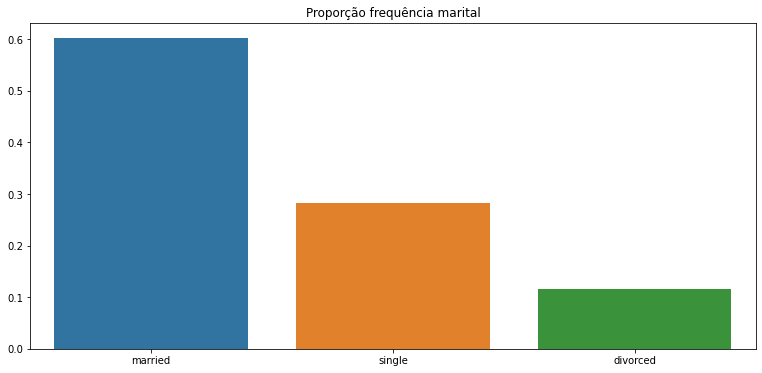

In [71]:
# gráfico de barras (com o value_counts())
plt.figure(figsize = (13,6))
sns.barplot(x = marital_freq.index, y = marital_freq.values)
plt.title('Proporção frequência marital');

In [72]:
# proporção da variável job
job_freq = dados.job.value_counts(normalize = True)
job_freq

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

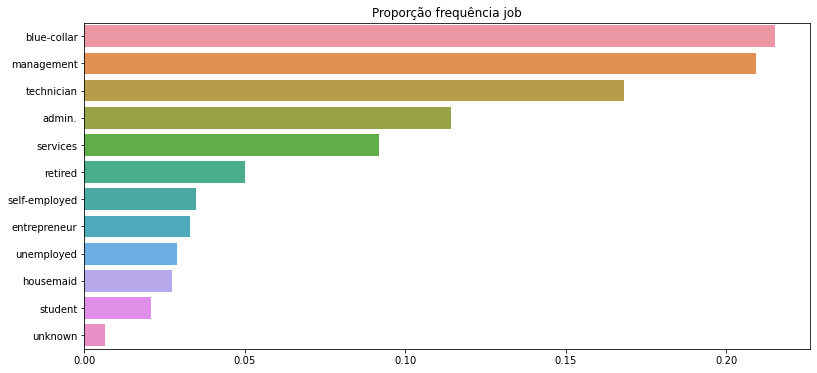

In [73]:
# gráfico de barras (com o value_counts())
plt.figure(figsize = (13,6))
sns.barplot(y = job_freq.index, x = job_freq.values, orient = "h")
plt.title('Proporção frequência job');

In [74]:
# proporção da variável education
education_freq = dados.education.value_counts(normalize = True)
education_freq

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: education, dtype: float64

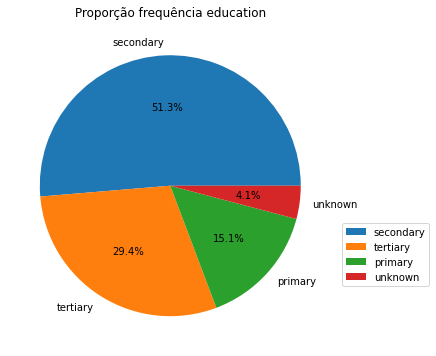

In [75]:
# gráfico de pizza (com o value_counts())
plt.figure(figsize = (13,6))
plt.pie(education_freq, labels = education_freq.index, autopct = '%1.1f%%')
plt.title('Proporção frequência education')
plt.legend(bbox_to_anchor = (1.31,0.4));

In [76]:
# proporção da variável response
response_freq = dados.response.value_counts(normalize = True)
response_freq

no     0.882982
yes    0.117018
Name: response, dtype: float64

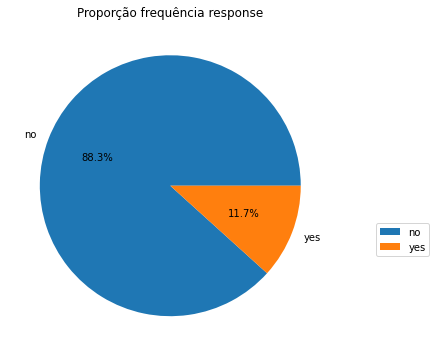

In [77]:
# gráfico de pizza (com o value_counts())
plt.figure(figsize = (13,6))
plt.pie(response_freq, labels = response_freq.index, autopct = '%1.1f%%')
plt.title('Proporção frequência response')
plt.legend(bbox_to_anchor = (1.31,0.4));

###  ANÁLISE MULTIVARIADA

####  VARIÁVEIS NUMÉRICAS (BIVARIADA)

Para estudar o relacionamento entre 2 varáveis numéricas, geralmente o scatter plot (gráfico de dispersão) é escolhido.

<h4>  Saldo X Salário

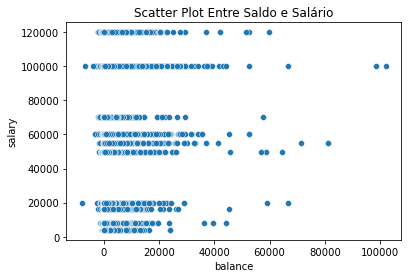

In [78]:
sns.scatterplot(dados["balance"], dados["salary"])
plt.title("Scatter Plot Entre Saldo e Salário")
plt.show()

Podemos observar que não há uma relação linear entre saldo bancário e salário.

<h4>  Saldo X Idade

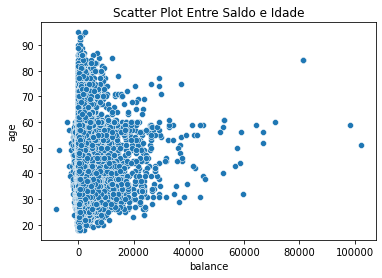

In [79]:
sns.scatterplot(dados["balance"], dados["age"])
plt.title("Scatter Plot Entre Saldo e Idade")
plt.show()

No gráfico acima detectamos uma tendência. Á medida que a idade aumenta, parece haver um pequeno aumento também no saldo da conta. Faz todo o sentido, apesar de a relação linear não ser tão clara.

<h4>  Correlação Salário X Balanço X Idade

O gráfico de correlação também é utilizado apenas para variáveis numéricas.

In [80]:
# calcula a correlação
res = dados[["salary", "balance", "age"]].corr()

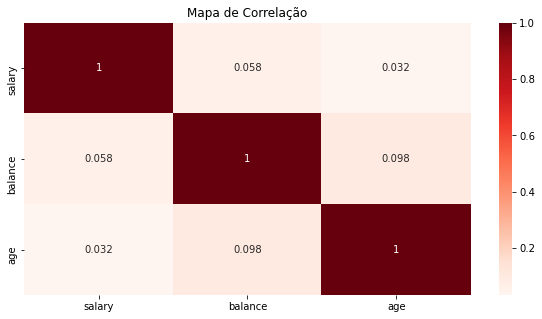

In [81]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação")
plt.show()

As variáveis utilizadas no gráfico de correlação não parecem ter relação direta entre si, pois os coeficientes de correlação estão próximos de 0. Lembrando que correlação não implica causalidade.

####  VARIÁVEIS NUMÉRICAS x CATEGÓRICAS

Para verificara o relacionamento entre varíaveis numéricas e categóricas podemos usar a função groupby(), que agrupa os dados de uma numérica de acordo com as categorias de outra variável, agregando alguma função (por exemplo, média) de acordo com essas categorias.

Podemos considerar esse tipo de comando como uma query SQL implementada no pandas.

In [87]:
# média salarial de acordo com a variável target
dados.groupby('response')['salary'].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

O que podemos entender do resultado acima é: os clientes que não compraram o produto bancário ganham em média 57.157,69. Já os que compraram o produto bancário ganham em média 59.157,55.

In [88]:
# mediana salarial de acordo com a variável target
dados.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

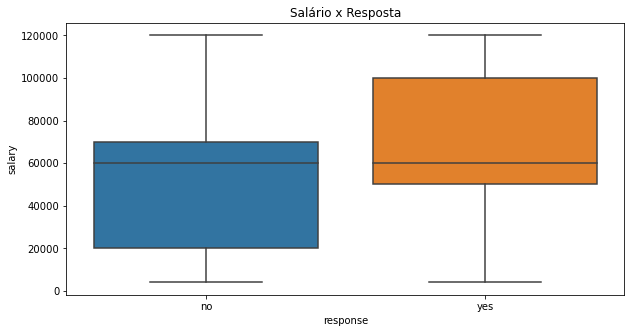

In [90]:
# boxplot salario, response
plt.figure(figsize = (10,5))
sns.boxplot(dados['response'], dados['salary'])
plt.title('Salário x Resposta')
plt.show()

Esse boxplot reafirma o que vimos no cálculo da média com o uso do groupby. Quem comprou o produto ganha acima de quem não comprou. Além disso, possuem medianas dos salários iguais.

Resumindo: quem ganha um salário maior tem mais chances de comprar um produto bancário. Faz todo o sentido!

In [91]:
# média salarial de acordo com a educação
dados.groupby('education')['salary'].mean()

education
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

A tabela acima nos mostra que, quanto maior o nível educacional, maior é o salário.

Vamos agora criar uma coluna com valores 1 e 0 para os valores da variável target, para que possamos criar um mapa de correlação com education e marital.

In [93]:
le = LabelEncoder()

In [94]:
dados['response_bin'] = le.fit_transform(dados['response'])

In [99]:
dados[['response', 'response_bin']].sample(4)

,response,response_bin
26808,no,0
43243,yes,1
25047,no,0
30906,no,0


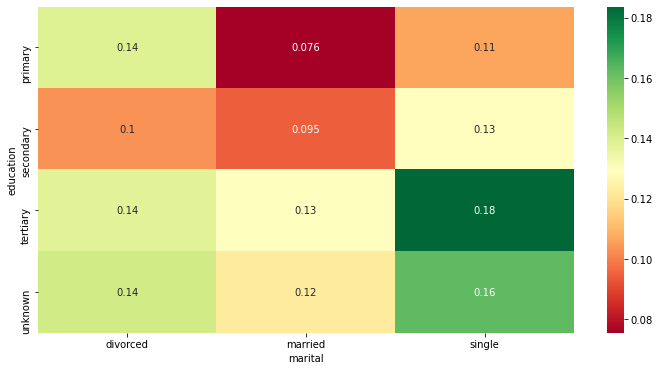

In [103]:
# pivot_table para uma variável
# indice: education, columns: marital, valores: response_flag, função: mean
# heatmap com a variável

plt.figure(figsize = (12,6))
pivot_table = dados.pivot_table(index = 'education', columns = 'marital', values = 'response_bin', aggfunc = 'mean')
sns.heatmap(pivot_table, annot = True, cmap = "RdYlGn");

O que podemos observar no mapa de correlação acima? Quando o cliente era solteiro (single) e tinha ensino superior (tertiary) havia uma alta correlação com a variável resposta, ou seja, maiores chances de comprar um produto bancário (0.18).

Pelo outro lado, quando a pessoa era casada (married marital) e possuía ensino primário (primary), menores eram as chances de comprar um produto bancário (0.076).

##  FIM